In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [38]:
df = pd.read_csv('shop_sales.csv')

In [39]:
# Извлечение номера магазина из store_id
df['store_id'] = df['store_id'].apply(lambda x: int(x.split('_')[1]))

# Извлечение номера из item_id
df['item_id'] = df['item_id'].apply(lambda x: int(x.split('_')[-1]))

In [40]:
df.head()

,item_id,store_id,date_id,cnt
0,85,2,1,3
1,85,2,2,8
2,85,2,3,0
3,85,2,4,3
4,85,2,5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81855 entries, 0 to 81854
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   item_id   81855 non-null  int64
 1   store_id  81855 non-null  int64
 2   date_id   81855 non-null  int64
 3   cnt       81855 non-null  int64
dtypes: int64(4)
memory usage: 2.5 MB


Количество строк: 81855, Количество столбцов: 4

Типы данных:
item_id     int64
store_id    int64
date_id     int64
cnt         int64
dtype: object

Количество пропущенных значений: 0

Статистическое описание числовых данных:
            item_id      store_id       date_id           cnt
count  81855.000000  81855.000000  81855.000000  81855.000000
mean     397.888889      2.000000    910.000000     23.201405
std      230.070112      0.816502    525.103198     36.935855
min       12.000000      1.000000      1.000000      0.000000
25%      222.000000      1.000000    455.000000      1.000000
50%      376.000000      2.000000    910.000000      9.000000
75%      586.000000      3.000000   1365.000000     32.000000
max      804.000000      3.000000   1819.000000    763.000000


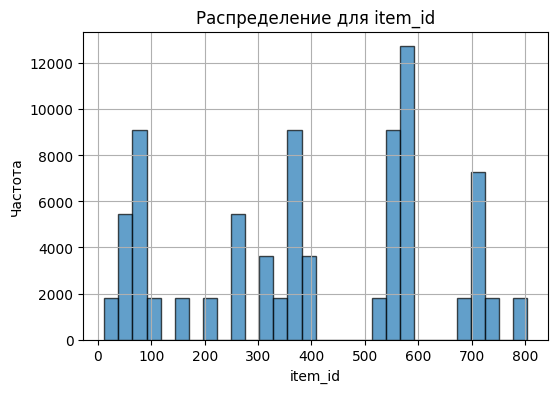

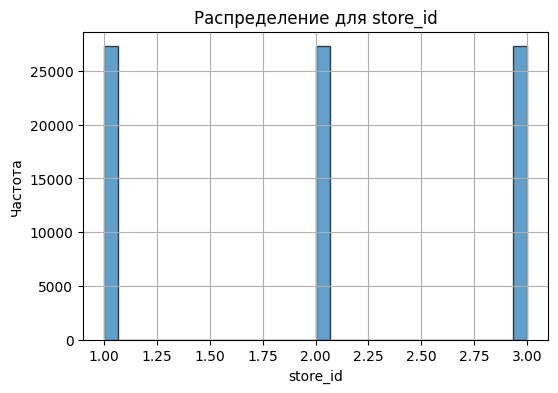

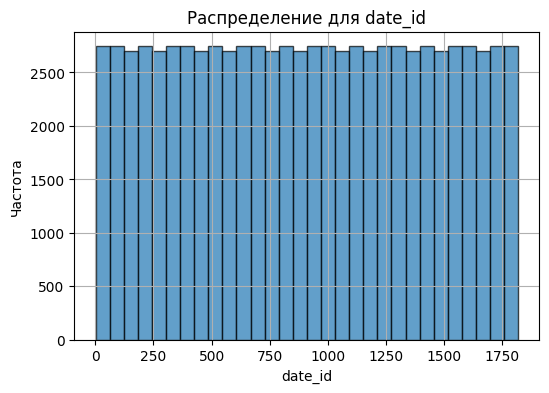

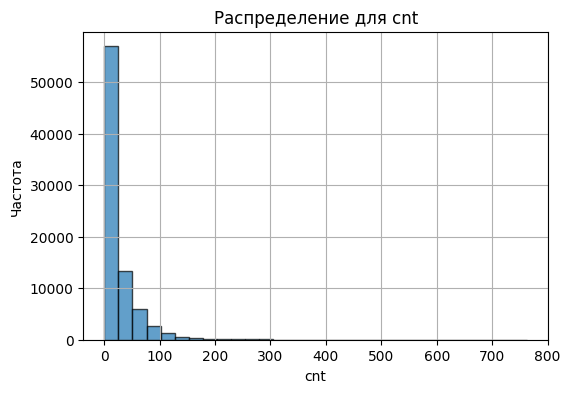


Выбросы в item_id:
Series([], Name: item_id, dtype: int64)

Выбросы в store_id:
Series([], Name: store_id, dtype: int64)

Выбросы в date_id:
Series([], Name: date_id, dtype: int64)

Выбросы в cnt:
7276     108
7277     132
7278     102
7279     120
7280     106
        ... 
78714     97
78735     85
78741     81
78791     82
79119     94
Name: cnt, Length: 5439, dtype: int64


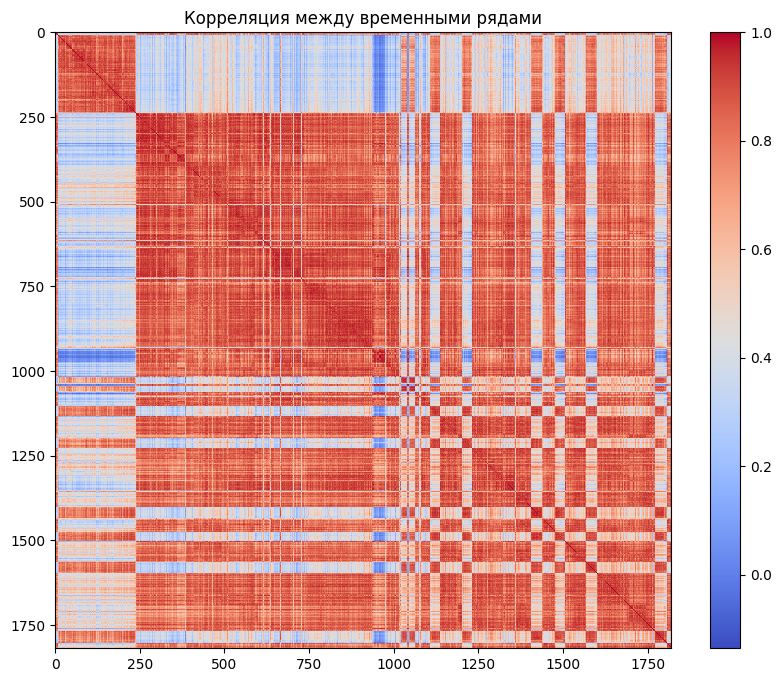

In [54]:
# Размеры данных
num_rows, num_columns = df.shape
print(f"Количество строк: {num_rows}, Количество столбцов: {num_columns}")

# Типы данных
print("\nТипы данных:")
print(df.dtypes)

# Плотность данных
missing_values = df.isnull().sum().sum()
print(f"\nКоличество пропущенных значений: {missing_values}")

# Статистика по числовым данным
print("\nСтатистическое описание числовых данных:")
print(df.describe())

# Распределение значений
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Распределение для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

# Проверка на выбросы (например, с помощью метода межквартильного размаха)
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))][column]
    print(f"\nВыбросы в {column}:")
    print(outliers)

# Корреляция временных рядов
if 'date_id' in df.columns:
    # Pivot the data to create time series
    pivot_table = df.pivot_table(index=['item_id', 'store_id'], columns='date_id', values='cnt', fill_value=0)
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    corr_matrix = pivot_table.corr()
    plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.title('Корреляция между временными рядами')
    plt.show()

**K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

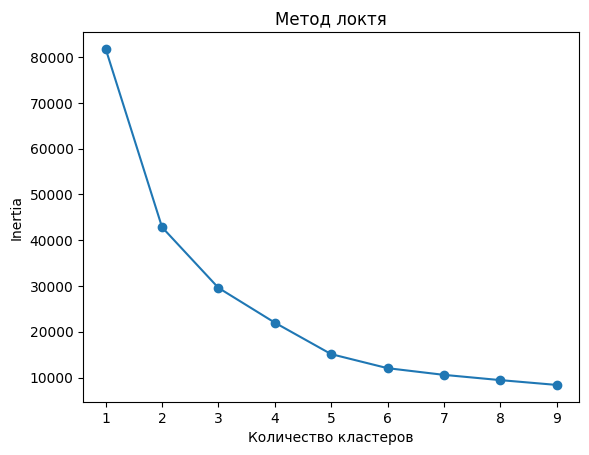

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


date_id             1     2    3     4     5     6    7    8    9   10  ...  \
item_id store_id                                                        ...   
12      3         0.0   0.0  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  ...   
43      2         6.0   0.0  0.0   1.0   0.0   0.0  2.0  4.0  0.0  0.0  ...   
54      2         6.0  12.0  5.0  10.0  19.0  18.0  2.0  5.0  4.0  7.0  ...   
64      1         0.0   1.0  0.0   0.0   0.0   0.0  2.0  0.0  1.0  0.0  ...   
65      1         0.0   0.0  2.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  ...   

date_id           1811  1812  1813  1814  1815  1816  1817  1818  1819  \
item_id store_id                                                         
12      3         11.0  11.0   9.0   6.0   7.0   4.0  12.0  19.0   3.0   
43      2          0.0   0.0   0.0   1.0   0.0   0.0   2.0   0.0   0.0   
54      2          0.0   4.0   2.0   5.0   4.0   7.0   2.0   1.0   6.0   
64      1          2.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
65

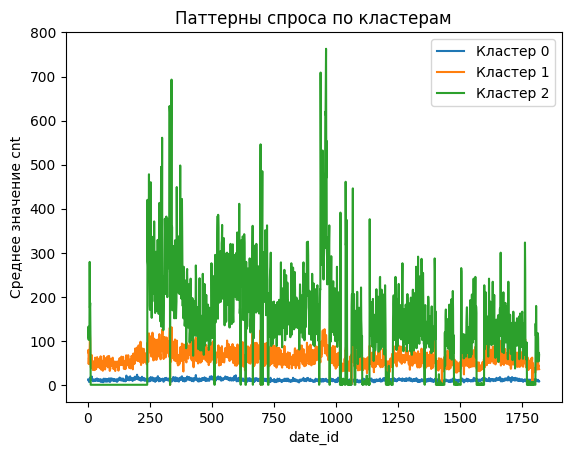

In [45]:
# Создание временного ряда для каждого товара и магазина
pivot_table = df.pivot_table(index=['item_id', 'store_id'], columns='date_id', values='cnt', fill_value=0)

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_table)

# Определение количества кластеров с помощью метода локтя
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

# Обучение модели K-means с выбранным количеством кластеров
n_clusters = 3  # например, по результатам метода локтя
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Добавление кластеров в исходный датасет
pivot_table['cluster'] = clusters

# Вывод результатов
print(pivot_table.head())

# Визуализация
for cluster in range(n_clusters):
    cluster_data = pivot_table[pivot_table['cluster'] == cluster].drop('cluster', axis=1).mean(axis=0)
    plt.plot(cluster_data, label=f'Кластер {cluster}')

plt.xlabel('date_id')
plt.ylabel('Среднее значение cnt')
plt.legend()
plt.title('Паттерны спроса по кластерам')
plt.show()

**BDSCAN**

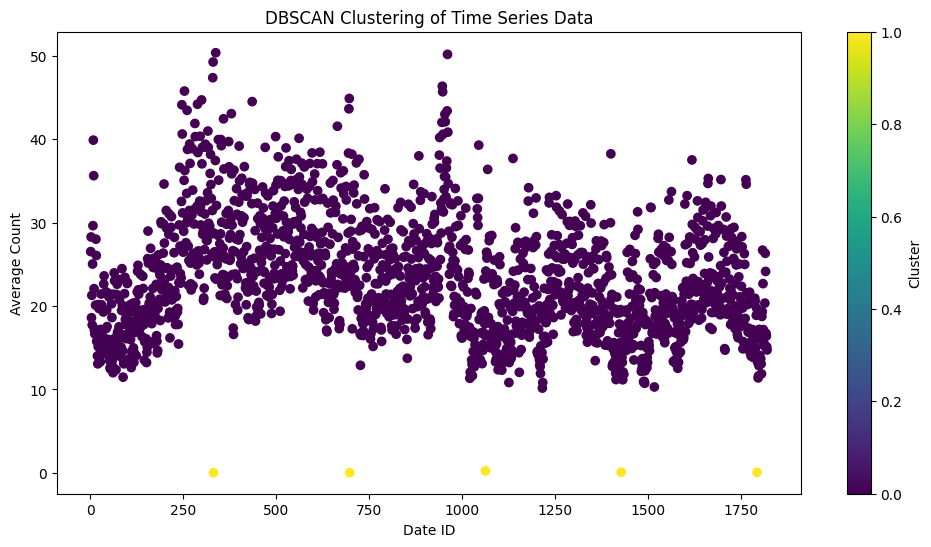

In [62]:
from sklearn.cluster import DBSCAN

# Подготовка данных: создание временного ряда (среднее по item_id в зависимости от времени)
time_series_data = df.groupby('date_id')['cnt'].mean().values.reshape(-1, 1)

# Стандартизация данных
scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series_data)

# Применение алгоритма DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(time_series_scaled)

# Добавление кластерных меток обратно в DataFrame
result = pd.DataFrame({'date_id': df['date_id'].unique(), 'cnt': time_series_data.flatten(), 'cluster': clusters})

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(result['date_id'], result['cnt'], c=result['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering of Time Series Data')
plt.xlabel('Date ID')
plt.ylabel('Average Count')
plt.colorbar(label='Cluster')
plt.show()# Применение алгоритма DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(time_series_scaled)

**AgglomerativeClustering**

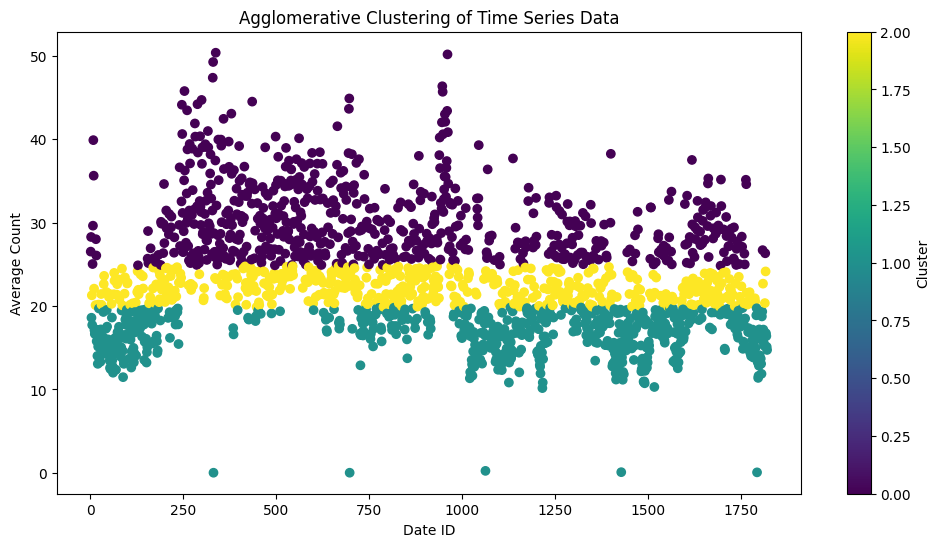

In [63]:
from sklearn.cluster import AgglomerativeClustering

# Подготовка данных: создание временного ряда (среднее по item_id в зависимости от времени)
time_series_data = df.groupby('date_id')['cnt'].mean().values.reshape(-1, 1)

# Стандартизация данных
scaler = StandardScaler()
time_series_scaled = scaler.fit_transform(time_series_data)

# Применение агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(time_series_scaled)

# Добавление кластерных меток обратно в DataFrame
result = pd.DataFrame({'date_id': df['date_id'].unique(), 'cnt': time_series_data.flatten(), 'cluster': clusters})

# Визуализация
plt.figure(figsize=(12, 6))
plt.scatter(result['date_id'], result['cnt'], c=result['cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering of Time Series Data')
plt.xlabel('Date ID')
plt.ylabel('Average Count')
plt.colorbar(label='Cluster')
plt.show()